importing and heuristic functions

In [ ]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [ ]:
def heuristic_mahattan(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return  (dx+dy)

In [ ]:
def heuristic_diagonal(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return (dx+dy) + (math.sqrt(2) - 2) * min(dx,dy)

In [ ]:
def heuristic_euclidean(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return math.sqrt(dx**2 + dy**2)

In [ ]:
class Graph:
    def __init__(self):
        self.start = 0
        self.end = 0
        self.points = []
        self.edges = {}
        for i in range(len(self.points)):
            self.edges[i] = set()
# Graph đơn giản. Self.points là tọa độ của mỗi điểm.
# Self.edges sẽ là 1 dictionary, key chạy từ 0 - len(self.points), value là 1 set bao gồm những điểm nối với key đó.
    def generate_points(self, n):
        self.points = [[random.randint(0, 100), random.randint(0, 100)] for i in range(n)]
        for i in range(len(self.points)):
            self.edges[i] = set()
    def distance(self, point1, point2):
        return math.sqrt((self.points[point1][0] - self.points[point2][0])**2 + (self.points[point1][1] - self.points[point2][1])**2)

    def generate_edges(self, density):
        for i in range(len(self.points)):
            distance_from_point_i = sorted([[k, self.distance(i, k)] for k in range(len(self.points))], key = lambda x : x[1])[1:]
            for j in range(density):
                self.edges[i].add(distance_from_point_i[j][0])
                self.edges[distance_from_point_i[j][0]].add(i)


In [ ]:
def draw_graph(graph, path = []):
    G = nx.Graph()
    edge_list = list(zip(path, path[1:]))
    for i in range(len(graph.points)):
        G.add_node(i, pos = graph.points[i])
    node_color_map = ['red' if node in path else 'blue' for node in G]
    for point1, point2s in graph.edges.items():
        for point2 in point2s:
            G.add_edge(point1, point2, color = 'red' if ((point1, point2) in edge_list) else 'black', label = round(graph.distance(point1, point2), 2))
        edge_color_map = 'black'
    if len(path) > 0:
        edge_color_map = [G[u][v]['color'] for u,v in G.edges]
    fig, ax = plt.subplots(figsize = (10, 5))
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_color = node_color_map, edge_color = edge_color_map, node_size = 100, ax = ax)
    nx.draw_networkx_labels(G, pos, font_size = 6)
    nx.draw_networkx_edge_labels(G, pos, font_size = 5, ax = ax, edge_labels=nx.get_edge_attributes(G,'label'))
    ax.set_axis_on()
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

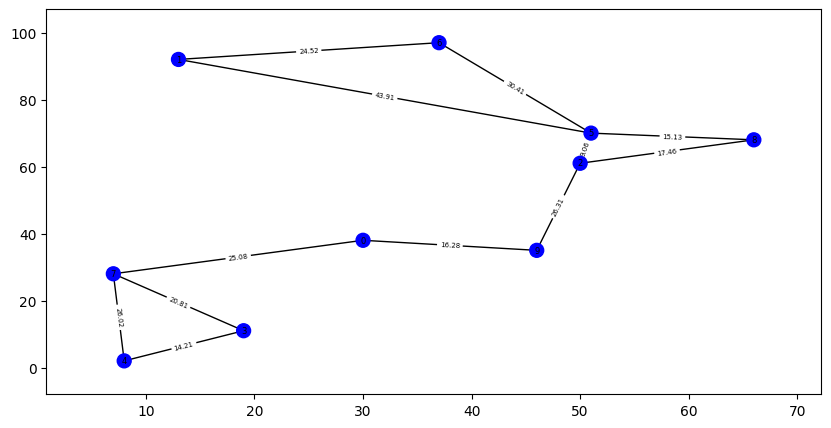

In [ ]:
random.seed(4)
graph1 = Graph()
graph1.generate_points(10)
graph1.generate_edges(2)
draw_graph(graph1)

In [ ]:
graph1.edges

{0: {7, 9},
 1: {5, 6},
 2: {5, 8, 9},
 3: {4, 7},
 4: {3, 7},
 5: {1, 2, 6, 8},
 6: {1, 5},
 7: {0, 3, 4},
 8: {2, 5},
 9: {0, 2}}

In [ ]:
def astar(graph, start, end):
    open_list = []
    closed_set = set()
    g_values = {node: float('inf') for node in range(len(graph.points))}
    g_values[start] = 0
    parent = {}


    heapq.heappush(open_list, (0, start))

    while open_list:
        current_f, current_node = heapq.heappop(open_list)

        if current_node == end:

            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent.get(current_node)
            return path[::-1]

        closed_set.add(current_node)

        for neighbor in graph.edges[current_node]:
            if neighbor in closed_set:
                continue

            tmp = g_values[current_node] + graph.distance(current_node, neighbor)

            if tmp < g_values[neighbor]:
                g_values[neighbor] = tmp
                parent[neighbor] = current_node
                h_value = heuristic_euclidean(graph.points[neighbor], graph.points[end])
                heapq.heappush(open_list, (tmp + h_value, neighbor))

    return None  # algorithm cant find the path

In [ ]:
path = astar(graph1, 3, 6)
if path:
    print(path)
else:
    print("path can't be found")

[3, 7, 0, 9, 2, 5, 6]


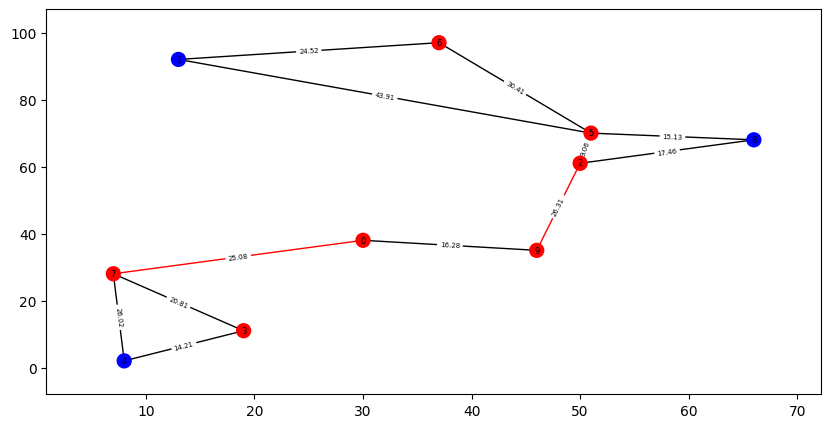

In [ ]:
draw_graph(graph1, path)